PHÂN TÍCH THỐNG KÊ DỮ LIỆU GIÁ VÀNG 

In [35]:
import pandas as pd

# --- Đọc dữ liệu ---
gold = pd.read_csv("gold_cleaned.csv", parse_dates=["Datetime"])
gold = gold.drop(columns=["Unnamed: 0"], errors="ignore")

# --- Thông tin tổng quát ---
print("="*60)
print(" TỆP: GOLD_CLEANED.CSV")
print("="*60)
print(f"- Số dòng: {gold.shape[0]}")
print(f"- Số cột: {gold.shape[1]}")

if "Datetime" in gold.columns:
    print(f"- Khoảng thời gian: {gold['Datetime'].min()} → {gold['Datetime'].max()}")

print("\n Kiểu dữ liệu từng cột:")
print(gold.dtypes)

print("\n Số lượng giá trị bị thiếu:")
print(gold.isna().sum())

print("\n Số lượng giá trị duy nhất:")
print(gold.nunique())

# --- Thống kê mô tả chi tiết ---
print("\n Thống kê mô tả chi tiết:")
try:
    print(gold.describe(datetime_is_numeric=True, include="all").T)
except TypeError:
    print(gold.describe(include="all").T)

# --- Phân tích chi tiết từng cột số ---
num_cols = gold.select_dtypes(include="number").columns
print("\n Phân tích chi tiết các cột số:")
for col in num_cols:
    print(f"\nCột: {col}")
    print(f"  → Mean (Trung bình): {gold[col].mean():,.2f}")
    print(f"  → Median (Trung vị): {gold[col].median():,.2f}")
    print(f"  → Min (Nhỏ nhất): {gold[col].min():,.2f}")
    print(f"  → Max (Lớn nhất): {gold[col].max():,.2f}")
    print(f"  → Std (Độ lệch chuẩn): {gold[col].std():,.2f}")


 TỆP: GOLD_CLEANED.CSV
- Số dòng: 5741
- Số cột: 6
- Khoảng thời gian: 2024-09-29 22:00:00+00:00 → 2025-09-26 20:00:00+00:00

 Kiểu dữ liệu từng cột:
Datetime    datetime64[ns, UTC]
Close                   float64
High                    float64
Low                     float64
Open                    float64
Volume                    int64
dtype: object

 Số lượng giá trị bị thiếu:
Datetime    0
Close       0
High        0
Low         0
Open        0
Volume      0
dtype: int64

 Số lượng giá trị duy nhất:
Datetime    5741
Close       3824
High        3787
Low         3815
Open        3837
Volume      4638
dtype: int64

 Thống kê mô tả chi tiết:
           count                                 mean  \
Datetime    5741  2025-03-30 18:27:08.496777728+00:00   
Close     5741.0                          3082.219162   
High      5741.0                          3086.686253   
Low       5741.0                          3075.718745   
Open      5741.0                           3081.96781   
Volum

Biểu đồ xu hướng giá vàng theo thời gian (7 ngày & 30 ngày)

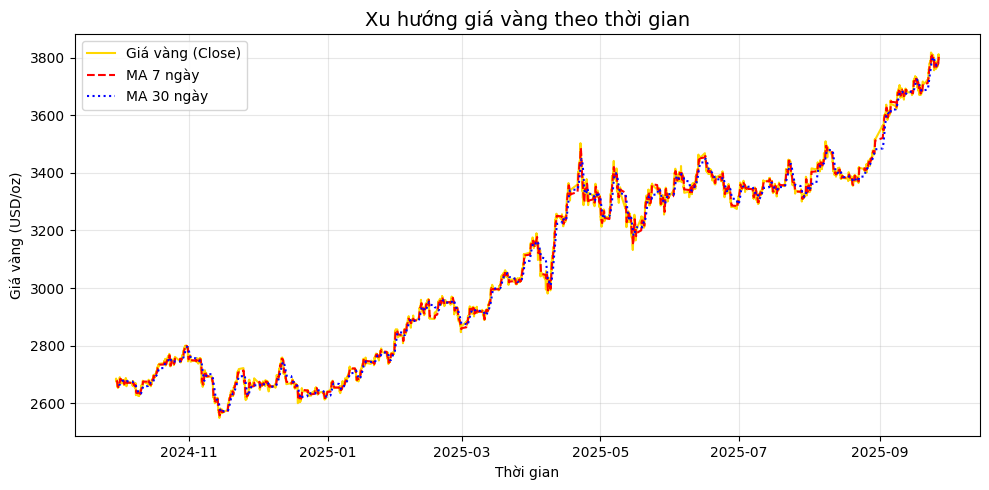

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Đọc dữ liệu ---
gold = pd.read_csv("gold_cleaned.csv", parse_dates=["Datetime"])
gold = gold.drop(columns=["Unnamed: 0"], errors="ignore")
gold["Datetime"] = pd.to_datetime(gold["Datetime"], utc=True).dt.tz_convert(None)
gold = gold.set_index("Datetime").sort_index()

# --- Tạo thêm các cột phân tích ---
gold["Return"] = gold["Close"].pct_change()           # lợi suất
gold["MA7"] = gold["Close"].rolling(7).mean()         # trung bình động 7 ngày
gold["MA30"] = gold["Close"].rolling(30).mean()       # trung bình động 30 ngày
gold["Volatility30"] = gold["Return"].rolling(30).std()

# Biểu đồ Xu hướng giá vàng theo thời gian
plt.figure(figsize=(10,5))
plt.plot(gold.index, gold["Close"], color="gold", label="Giá vàng (Close)")
plt.plot(gold.index, gold["MA7"], color="red", linestyle="--", label="MA 7 ngày")
plt.plot(gold.index, gold["MA30"], color="blue", linestyle=":", label="MA 30 ngày")
plt.title("Xu hướng giá vàng theo thời gian", fontsize=14)
plt.xlabel("Thời gian")
plt.ylabel("Giá vàng (USD/oz)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Giải thích thuật ngữ
MA7 (Moving Average 7 ngày): là giá trung bình của 7 ngày gần nhất, phản ánh xu hướng ngắn hạn.

MA30 (Moving Average 30 ngày): là giá trung bình của 30 ngày gần nhất, thể hiện xu hướng dài hạn hơn.

### Phân tích xu hướng giá vàng theo thời gian
Biểu đồ thể hiện diễn biến giá vàng thế giới từ cuối năm 2024 đến tháng 9/2025.  
Giá vàng nhìn chung có xu hướng tăng ổn định theo thời gian, với một số đợt điều chỉnh ngắn hạn.  
Đường trung bình động 7 ngày (MA7) và 30 ngày (MA30) giúp làm mượt dữ liệu, cho thấy rõ xu hướng dài hạn.  
Giai đoạn từ tháng 3 đến 9/2025 là thời kỳ giá vàng tăng mạnh, có thể phản ánh tác động của yếu tố kinh tế vĩ mô như lạm phát, lãi suất hoặc biến động thị trường tài chính.
=> Kết luận: Giá vàng duy trì đà tăng dài hạn, thể hiện tâm lý tích trữ tài sản an toàn của nhà đầu tư.

# ========== BIỂU ĐỒ PHÂN PHỐI LỢI SUẤT ==========

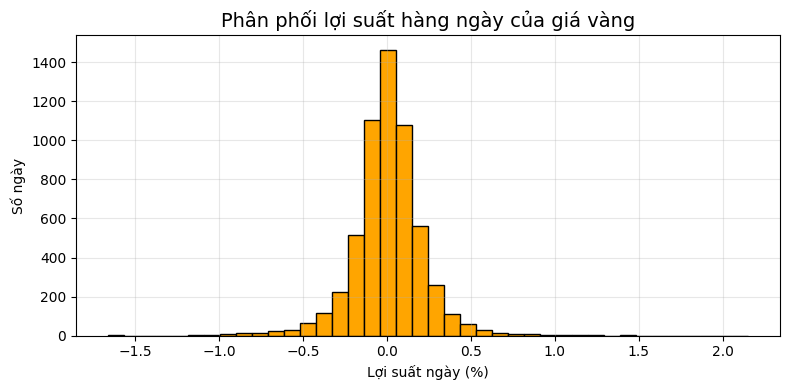

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(gold["Return"].dropna()*100, bins=40, color="orange", edgecolor="black")
plt.title("Phân phối lợi suất hàng ngày của giá vàng", fontsize=14)
plt.xlabel("Lợi suất ngày (%)")
plt.ylabel("Số ngày")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Phân tích phân phối lợi suất hàng ngày
Phân phối lợi suất hàng ngày của giá vàng có dạng chuẩn (Normal Distribution) tập trung quanh giá trị 0.  
Điều này cho thấy phần lớn các phiên giao dịch có biến động nhỏ, biên độ dao động hẹp.  
Các giá trị lợi suất cực trị (±1.5%) rất hiếm, phản ánh rằng thị trường vàng tương đối ổn định.  
=> Kết luận: Lợi suất giá vàng ngắn hạn ít biến động, phù hợp cho nhà đầu tư tìm kiếm tài sản ổn định.


# ========== BIỂU ĐỒ BIẾN ĐỘNG 30 NGÀY ==========

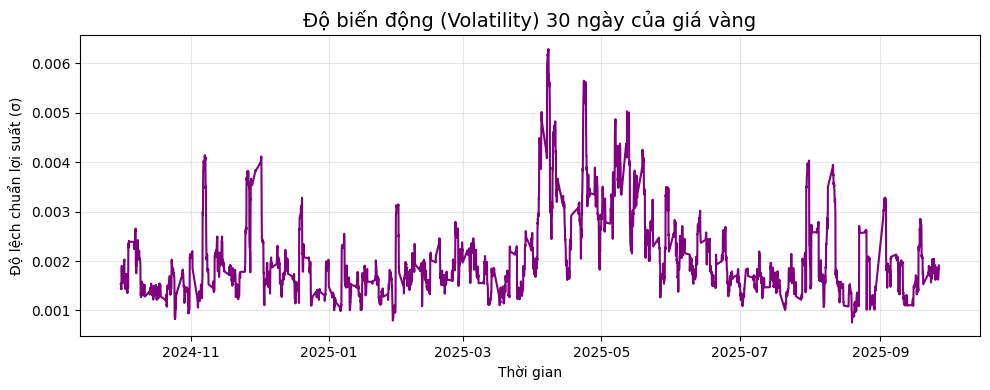

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(gold.index, gold["Volatility30"], color="purple")
plt.title("Độ biến động (Volatility) 30 ngày của giá vàng", fontsize=14)
plt.xlabel("Thời gian")
plt.ylabel("Độ lệch chuẩn lợi suất (σ)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Phân tích độ biến động (Volatility)
Độ lệch chuẩn lợi suất 30 ngày được sử dụng để đo độ biến động của giá vàng.  
Giai đoạn từ tháng 3 đến tháng 6/2025 xuất hiện nhiều đỉnh biến động cao, trùng với thời điểm giá vàng tăng mạnh.  
Điều này cho thấy giai đoạn tăng giá thường đi kèm với rủi ro cao hơn.  
Từ tháng 7 trở đi, độ biến động giảm dần, cho thấy thị trường trở lại trạng thái ổn định.  
=> Kết luận: Biến động giá vàng gia tăng mạnh khi xu hướng tăng được hình thành, phản ánh sự nhạy cảm của nhà đầu tư trước biến động thị trường.


Biểu đồ mối quan hệ giữa khối lượng giao dịch và độ biến động giá

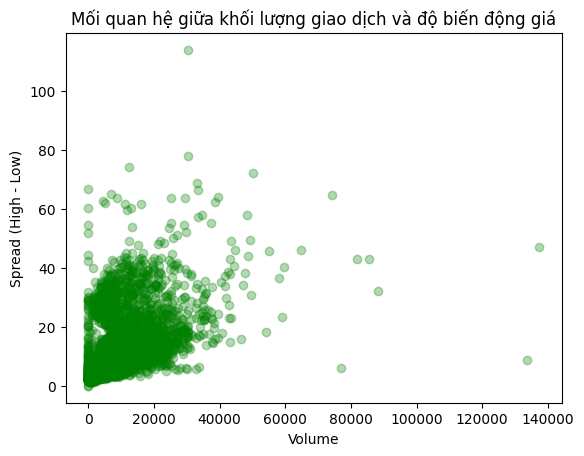

In [32]:
gold["Spread"] = gold["High"] - gold["Low"]

plt.scatter(gold["Volume"], gold["Spread"], alpha=0.3, color="green")
plt.title("Mối quan hệ giữa khối lượng giao dịch và độ biến động giá")
plt.xlabel("Volume")
plt.ylabel("Spread (High - Low)")
plt.show()

### Phân tích mối quan hệ giữa khối lượng và độ biến động
Biểu đồ thể hiện mối quan hệ giữa khối lượng giao dịch (Volume) và mức chênh lệch giá (High – Low).  
Có thể thấy khi khối lượng giao dịch tăng, độ biến động giá cũng có xu hướng cao hơn.  
Tuy nhiên, mối quan hệ này không tuyến tính mạnh, cho thấy ngoài yếu tố khối lượng, còn nhiều yếu tố khác ảnh hưởng đến dao động giá vàng như tin tức và tâm lý thị trường.  
=> Kết luận: Khối lượng giao dịch tăng có thể làm biên độ giá mở rộng, nhưng không phải yếu tố duy nhất quyết định biến động giá.
